# Summary

<p>
This project approaches the topic of synthetic data.<br>
The use case is synthetic data for linear regression.<br>
It is aligned with others projects of mine concerning simulations.<br>
It explores different ideas and discards some of those as not expedient.<br>
It is going to be expanded later.<br>
For example <a href="https://en.wikipedia.org/wiki/Resampling_%28statistics%29" target="_blank">Resampling methods</a> are going to be explored in this context later. 
</p> 

<p>    
The project here covers topics like:
</p> 

<p>
<ul>
  <li>linnerud-dataset</li>
  <li>complement the data set with synthetic data</li>
  <li>visualization</li>
  <li>Scipy linregress - simple linear regression</li>
  <li>Scikit-learn - Supervise Learning Estimator - Linear Regression</li>
  <li>creating synthetic data on basis of the regression equation</li>
  <li>residuals and assumptions of normality</li>
  <li>adding random noise into the error terms</li>
  <li>normal and uniform noise</li>
  <li>sklearn.datasets.make_regression</li>
    
</ul>
</p> 

## Install packages

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import collections
import statistics
import scipy.stats as stats
import itertools
import random as rd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import mean_absolute_error

In [404]:
# This a text dictionary for matplotlib plots
fontdict_1={'size':'x-large', 
          'color':'blueviolet', 
          'weight':'bold',
          'family':'arial'}

sns.set_style('darkgrid')



# print(random, type(random))

### Synthetic data for linear regression 


In [405]:
# Load toy data set from scikit
fitness = datasets.load_linnerud(return_X_y=True, as_frame=True)

In [406]:
# look into the data
print(np.shape(fitness))
print(type(fitness))

(2, 20, 3)
<class 'tuple'>


In [407]:
fitness[0][:2]

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0


In [408]:
fitness[1][:2]

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0


In [409]:
training = fitness[0]
conditions = fitness[1]


In [410]:
training.iloc[:2,0:3]

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0


In [411]:
conditions.iloc[:2, 0:3]

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0


In [412]:
fitness_111 = pd.concat([training, conditions], axis=1)
fitness_111.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [413]:
fitness_111.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


The range of the features varies.<br>
Maybe scaling?

#### <b>Visualization of relationships between explanatory and response variables</b>

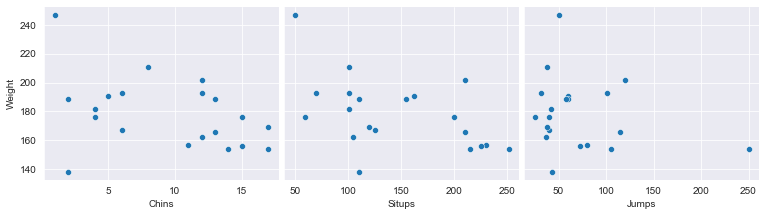

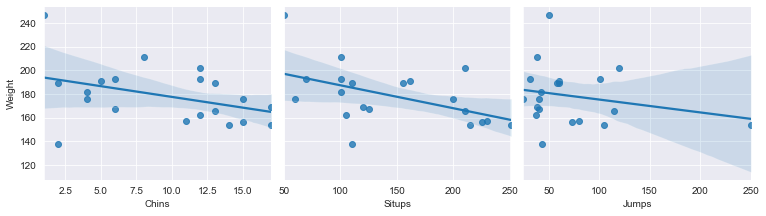

In [414]:
sns.pairplot(data=fitness_111, x_vars=training.columns, y_vars=['Weight'], height=3, aspect=1.2)
sns.pairplot(data=fitness_111, x_vars=training.columns, y_vars=['Weight'], kind='reg', height=3, aspect=1.2)
plt.show()

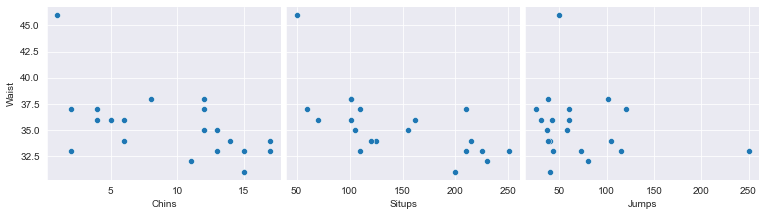

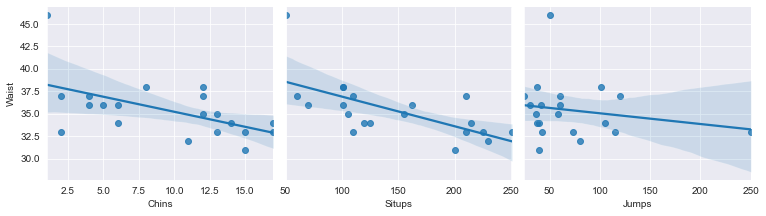

In [415]:
sns.pairplot(data=fitness_111, x_vars=training.columns, y_vars=['Waist'], height=3, aspect=1.2)
sns.pairplot(data=fitness_111, x_vars=training.columns, y_vars=['Waist'], kind='reg', height=3, aspect=1.2)

plt.show()

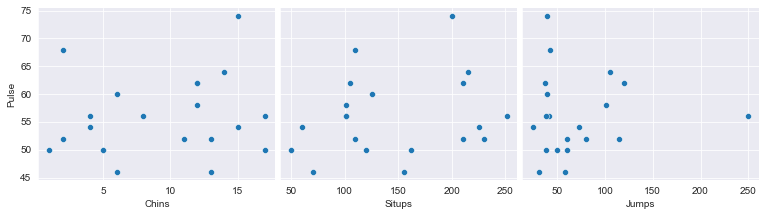

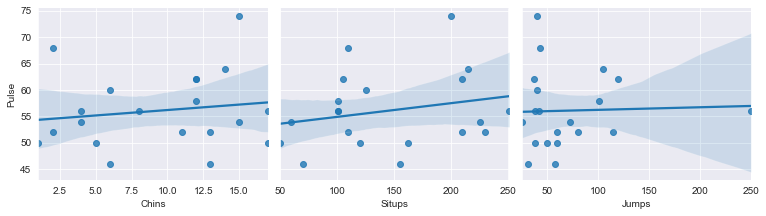

In [416]:
sns.pairplot(data=fitness_111, x_vars=training.columns, y_vars=['Pulse'], height=3, aspect=1.2)
sns.pairplot(data=fitness_111, x_vars=training.columns, y_vars=['Pulse'], kind='reg', height=3, aspect=1.2)
plt.show()

The correlation are not great according to the plots.<br>
This maybe based on the limited number of observations.

#### <b> Scipy linregress - simple linear regression</b>
<p>
of the fitness data with only one predictor variable.<br>
Chins predicting weight.
</p> 


In [417]:
slope_fit, intercept_fit, r_value_fit, p_value_fit, std_err_fit = \
stats.linregress(x=training.loc[:, "Chins"], y=conditions.loc[:, 'Weight'])

In [418]:
print("slope_fit:", slope_fit)
print("intercept_fit:", intercept_fit)

slope_fit: -1.8201337225727465
intercept_fit: 195.80026367831243


In [419]:
print('slope_fit', slope_fit)
print('intercept_fit', intercept_fit)

slope_fit -1.8201337225727465
intercept_fit 195.80026367831243


In [420]:
score_fit_31 = slope_fit*31 + intercept_fit
print('score_fit_31 :', score_fit_31 )

score_fit_31 : 139.3761182785573


In [421]:
score_fit_45  = slope_fit*45 + intercept_fit
print('score_fit_45:', score_fit_45)

score_fit_45: 113.89424616253883


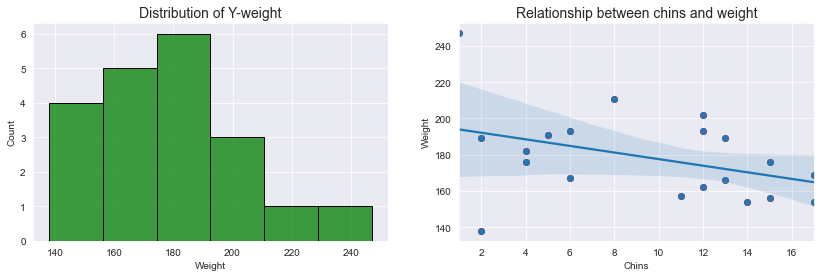

In [422]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

sns.histplot(fitness_111.Weight, ax=ax1, edgecolor='black', color='g')
ax1.set_title('Distribution of Y-weight', fontsize=14)

ax2 = plt.scatter(x=fitness_111.Chins, y=fitness_111.Weight, alpha=0.9, edgecolor='red')
ax2 = plt.title('Relationship between chins and weight', fontsize=14)
sns.regplot(x='Chins', y='Weight', data=fitness_111)


plt.show()

#### <b>Scikit-learn - Supervise Learning Estimator - Linear Regression</b>

In [423]:
fitness_features, fitness_weight = fitness_111.iloc[:,:3], fitness_111.loc[:,'Weight']
fitness_features, fitness_weight = fitness_111.iloc[:,:3], fitness_111.loc[:,'Weight']
Xfit_train, Xfit_test, yfit_train, yfit_test = \
train_test_split(fitness_features, fitness_weight, random_state=3343)


In [424]:
# from sklearn import neighbors, datasets, preprocessing
scaler_fitness = preprocessing.StandardScaler().fit(Xfit_train)
Xfit_train_scaled = scaler_fitness.transform(Xfit_train)
Xfit_test_scaled = scaler_fitness.transform(Xfit_test)

In [425]:
linreg_fitness = LinearRegression(normalize=True)
linreg_fitness.fit(Xfit_train_scaled, yfit_train )

LinearRegression(normalize=True)

In [426]:
linreg_fitness_predictions = linreg_fitness.predict(Xfit_test_scaled)

In [427]:
fitness_residuals_df = \
pd.DataFrame(list(zip(yfit_test, linreg_fitness_predictions)), columns=['True_values', 'Predictions'])

fitness_residuals_df['Residuals'] = \
fitness_residuals_df.Predictions - fitness_residuals_df.True_values

fitness_residuals_df.head()

,True_values,Predictions,Residuals
0,191.0,180.812830,-10.187170
1,138.0,189.846399,51.846399
2,176.0,193.754438,17.754438
3,247.0,198.139413,-48.860587
4,193.0,181.772247,-11.227753


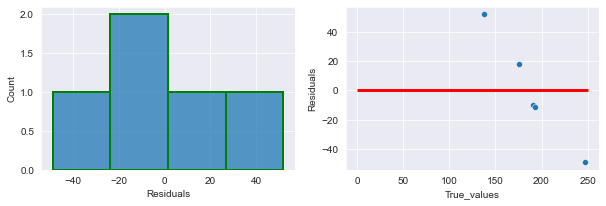

In [428]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(121)
ax = sns.histplot(x=fitness_residuals_df.Residuals, edgecolor='g', linewidth=2)

ax1 = fig.add_subplot(122)
ax1 = sns.scatterplot(x=fitness_residuals_df.True_values, y=fitness_residuals_df.iloc[:,2])
ax1.hlines(0, xmin=0, xmax=250, color='r', linewidth=3)

plt.show()

<p>
Linear regression only works, when the residuals or difference between predicted and actual values are  normally distributed.<br>
If the residuals are not normally distributed the regression line does not fit the whole data, but only sections of it, while in other sections the distribution takes a different slope.<br>
Maybe then the data follows more a polynomial distribution. <br>
In this example are not enough data points to draw a conclusion on this.
</p> 

#### <b>Evaluation metrics</b>

In [429]:
# from sklearn.metrics import r2_score
r2_fit = r2_score(yfit_test, linreg_fitness_predictions)
print(r2_fit )

0.08669694315935261


In [430]:
# from sklearn.metrics import mean_absolute_error
MAE_fit = mean_absolute_error(yfit_test, linreg_fitness_predictions)
print(MAE_fit)

27.97526948016225


In [431]:
# from sklearn.metrics import mean_squared_error
MSE_fit = mean_squared_error(yfit_test, linreg_fitness_predictions)
print(MSE_fit)

1124.0934023594687


In [432]:
RMSE_fit = np.sqrt(MSE_fit)
print(RMSE_fit)

33.527502178949575


The predictions are not deviating totally from the true values, but also not very good.<br>
One reason besides developing more accustomed models, is the small number of observations.<br>
Maybe enriching the data with synthetic data can help?

<p>
Understanding the data.<br>
<b>What are the unique values in the trainig data frame?</b><br>
I want to have those in a nice data frame, too.
</p> 

In [433]:
# Gaterhing some information about training
print(len(training.columns))
print(training.columns[0])
print(list(range(0, len(training.columns))))

3
Chins
[0, 1, 2]


In [434]:
# Determine unique values and store those in data frame
training_unique = {}

for i in range(0, len(training.columns)):
    training_unique[training.columns[i]] = np.sort(training.iloc[:,i].unique())


In [435]:
# The values are of different len
for k,v in training_unique.items():
    print(k+ ":", len(v))

Chins: 12
Situps: 16
Jumps: 17


In [436]:
# Append 0 to the arrays to make the len equal
chins_u_17 = np.append(training_unique['Chins'], np.repeat(0,5))
situps_u_17 = np.append(training_unique['Situps'], np.repeat(0,1))

print(len(chins_u_17))
print(len(situps_u_17))

17
17


In [437]:
# Update the dict with the arrays
training_unique.update({'Chins': chins_u_17, 'Situps': situps_u_17})

for k,v in training_unique.items():
    print(k+ ":", len(v))
# Len is now the same

Chins: 17
Situps: 17
Jumps: 17


In [438]:
training_df = pd.DataFrame(training_unique, columns=training.columns)
training_df 

,Chins,Situps,Jumps
0,1.0,50.0,25.0
1,2.0,60.0,31.0
2,4.0,70.0,37.0
3,5.0,101.0,38.0
4,6.0,105.0,40.0
5,8.0,110.0,42.0
6,11.0,120.0,43.0
7,12.0,125.0,50.0
8,13.0,155.0,58.0
9,14.0,162.0,60.0


In [439]:
training_df.aggregate({'median', 'min', 'max'})

,Chins,Situps,Jumps
median,5.0,125.0,58.0
max,17.0,251.0,250.0
min,0.0,0.0,25.0


In [440]:
conditions_unique = {}

for i in range(0, len(conditions.columns)):
    conditions_unique[conditions.columns[i]] = np.sort(conditions.iloc[:,i].unique())


c_len = []   
    
for k,v in conditions_unique.items():
    c_len.append(len(v))
    
cmax = np.max(c_len)


for k,v in conditions_unique.items():
    if len(v) < cmax:
        d = cmax - len(v)
        a = np.append(conditions_unique[k], np.repeat(0, d))
        conditions_unique.update({k: a})

c_unique_df = pd.DataFrame(conditions_unique, columns=list(conditions_unique.keys()))

In [441]:
for k,v in conditions_unique.items():
    print(k+":", len(v))

Weight: 16
Waist: 16
Pulse: 16


In [442]:
c_unique_df

,Weight,Waist,Pulse
0,138.0,31.0,46.0
1,154.0,32.0,50.0
2,156.0,33.0,52.0
3,157.0,34.0,54.0
4,162.0,35.0,56.0
5,166.0,36.0,58.0
6,167.0,37.0,60.0
7,169.0,38.0,62.0
8,176.0,46.0,64.0
9,182.0,0.0,68.0


In [443]:
c_unique_df.aggregate({'median', 'min', 'max'})

,Weight,Waist,Pulse
median,172.5,31.5,53.0
max,247.0,46.0,74.0
min,138.0,0.0,0.0


#### <b>Complement the data set with synthetic data</b>

<p>
As the dataset fitness has got only 20 observations, it is now complemented with "synthetic" data.<br>
If turns out this was not the right approach here.<br>
I do not erase it because also mistakes are instructive.
</p> 

In [444]:
# This line of code takes a recurring random sample from the given observations and stores it in a list.

train_0 = []

for i in range(1,10000):
    
    x = rd.sample(list(training.iloc[:,0]), 20)
    
    for f in range(0,20):
            train_0.append(x[f])

In [445]:
print(train_0[:5])
print(np.shape(train_0))

[15.0, 12.0, 5.0, 1.0, 17.0]
(199980,)


The code above is extended to a function.

In [446]:
def complement_data(y):
    
    yl = []

    for i in range(1,1000):
        
        x = rd.sample(list(y), len(y))
        
        for f in range(0,20):
                      yl.append(x[f])
    
    return yl

Checking if the function works.

In [447]:
oo = complement_data(y = training.iloc[:,0])
np.shape(oo)

(19980,)

Applying (map) the function to the training data.

In [448]:
# Input y for the function are the training cols.
training_iter = []

for i in training.columns:
    col = training.loc[:, i]
    training_iter.append(col)

In [449]:
zz  = list(map(complement_data, training_iter))
zz_2 = np.transpose(zz)

In [450]:
print(np.shape(zz_2))
print(type(zz_2))

(19980, 3)
<class 'numpy.ndarray'>


In [451]:
train_df_extend = pd.DataFrame(zz_2, columns=training.columns)

In [452]:
train_df_extend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   19980 non-null  float64
 1   Situps  19980 non-null  float64
 2   Jumps   19980 non-null  float64
dtypes: float64(3)
memory usage: 468.4 KB


In [453]:
train_df2 = train_df_extend.copy()

Applying (map) the function to the conditions data.

In [454]:
conditions.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [455]:
conditions.columns

Index(['Weight', 'Waist', 'Pulse'], dtype='object')

In [456]:
# Input y for the function are the training cols.
conditions_iter = []

for i in conditions.columns:
    col = conditions.loc[:, i]
    conditions_iter.append(col)
    
print(np.shape(conditions_iter))

(3, 20)


In [457]:
tt  = list(map(complement_data, conditions_iter))
tt_2 = np.transpose(tt)

print(np.shape(tt_2))
print(type(tt_2))
print(tt_2[:5,:3])



(19980, 3)
<class 'numpy.ndarray'>
[[247.  33.  62.]
 [193.  33.  54.]
 [162.  37.  62.]
 [138.  33.  60.]
 [193.  37.  64.]]


In [458]:
conditions_df_extend = pd.DataFrame(tt_2, columns=conditions.columns)
conditions_df_extend.info()
conditions_df_extend.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  19980 non-null  float64
 1   Waist   19980 non-null  float64
 2   Pulse   19980 non-null  float64
dtypes: float64(3)
memory usage: 468.4 KB


,Weight,Waist,Pulse
0,247.0,33.0,62.0
1,193.0,33.0,54.0
2,162.0,37.0,62.0
3,138.0,33.0,60.0
4,193.0,37.0,64.0


In [459]:
con_df2 = conditions_df_extend.copy()

Visualizing the relationship between training variables and a condition.

In [460]:
fit_df23 = pd.concat([train_df2, con_df2 ], axis=1)

fit_df23.columns
fit_df23.shape
fit_df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   19980 non-null  float64
 1   Situps  19980 non-null  float64
 2   Jumps   19980 non-null  float64
 3   Weight  19980 non-null  float64
 4   Waist   19980 non-null  float64
 5   Pulse   19980 non-null  float64
dtypes: float64(6)
memory usage: 936.7 KB


In [461]:
fit_df23.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,2.0,60.0,38.0,247.0,33.0,62.0
1,17.0,251.0,50.0,193.0,33.0,54.0
2,4.0,200.0,250.0,162.0,37.0,62.0
3,2.0,210.0,31.0,138.0,33.0,60.0
4,15.0,225.0,80.0,193.0,37.0,64.0


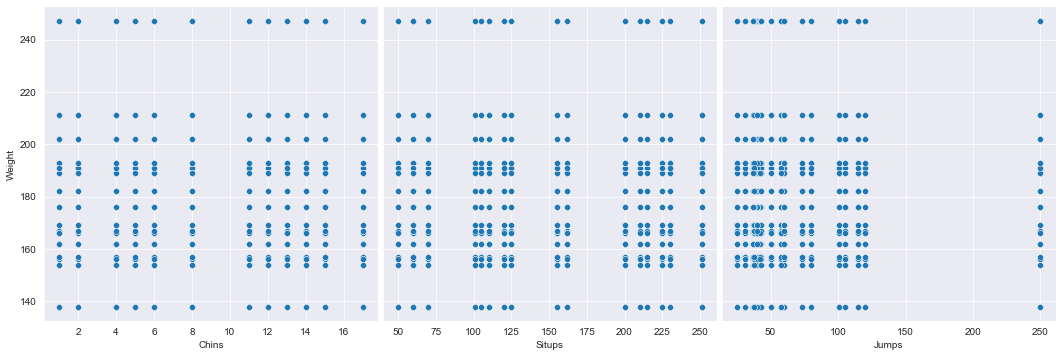

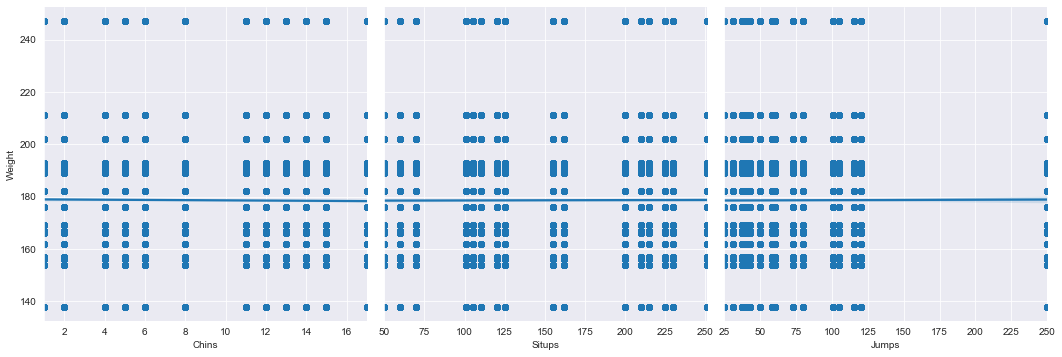

In [462]:
sns.pairplot(data=fit_df23,
             x_vars=['Chins', 'Situps', 'Jumps'], 
             y_vars = ['Weight'], 
             height=5, aspect=1)

sns.pairplot(data=fit_df23,
             x_vars=['Chins', 'Situps', 'Jumps'], 
             y_vars = ['Weight'], 
             height=5, aspect=1, kind='reg')

plt.show()

<p>
As the data is random so are the relationships between predictor and target variable.<br>
This is not a good way to create synthetic data for linear regression.<br>
Another way would be to create synthetic data on basis of the regression equation.<br>
<b>Regression equation:</b>
</p> 

<p>
<img src="regression_equation.png" alt="Smiley face" height="300" width="300"> 
</p> 

#### <b>Creating synthetic data on basis of the regression equation</b>

<p>
starting with the easy case of a simple linear regression of chins predicting weight.
</p>

In [463]:
fitness_111.loc[:,'Chins'].describe()

count    20.000000
mean      9.450000
std       5.286278
min       1.000000
25%       4.750000
50%      11.500000
75%      13.250000
max      17.000000
Name: Chins, dtype: float64

In [464]:
fit111_min = fitness_111.loc[:,'Chins'].describe()['min']
print(fit111_min)
fit111_max = fitness_111.loc[:,'Chins'].describe()['max']
print(fit111_max)

1.0
17.0


In [465]:
print("slope_fit:", slope_fit)
print("intercept_fit:", intercept_fit)

slope_fit: -1.8201337225727465
intercept_fit: 195.80026367831243


In [466]:
y1 = intercept_fit + slope_fit*10
print(y1)

177.59892645258498


In [467]:
# With random error term
y2 = intercept_fit + slope_fit*10 + 0.4
print(y2)

177.99892645258498


In [468]:
X_iv = np.linspace(fit111_min, fit111_max, 10000)

print(X_iv[50:60], X_iv[4570:4580])
print(np.max(X_iv))
print(np.min(X_iv))

[1.080008   1.08160816 1.08320832 1.08480848 1.08640864 1.0880088
 1.08960896 1.09120912 1.09280928 1.09440944] [8.31273127 8.31433143 8.31593159 8.31753175 8.31913191 8.32073207
 8.32233223 8.32393239 8.32553255 8.32713271]
17.0
1.0


In [469]:
error_terms= [rd.uniform(-1,1) for i in range(0,10000)]
print(np.max(error_terms))
print(np.min(error_terms))
print(error_terms[:10])

0.9995880441938583
-0.9997317212451948
[0.2380288959483341, 0.12137063384481372, -0.3164727289015379, -0.7947581803660693, 0.3499435350560689, -0.9801246076713803, 0.6851364262683726, -0.7366323867835143, -0.832914943174967, -0.233971066220664]


In [470]:

Y_created_1_list = []
Y_created_1_dict = dict()

for i, error in zip(X_iv, error_terms):
    y_dv = intercept_fit + slope_fit*i + error
    Y_created_1_list.append(y_dv)
    Y_created_1_dict[i] = y_dv 

In [471]:
print(len(Y_created_1_dict))
print(Y_created_1_dict[1])

10000
194.21815885168803


In [472]:
Y_created_1_list[:5]

[194.21815885168803,
 194.09858808437787,
 193.65783221642488,
 193.1766342597537,
 194.31842346996922]

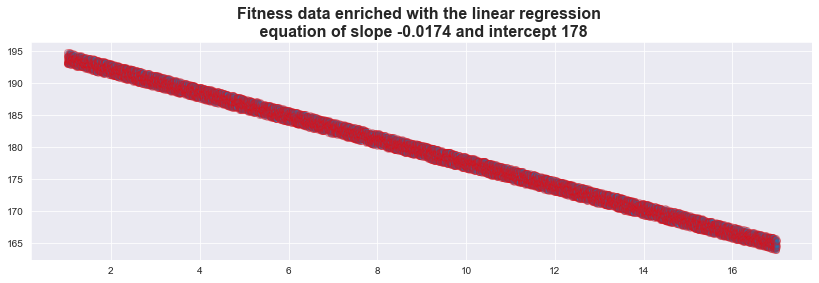

In [473]:
plt.figure(figsize=(14,4))
plt.scatter(x=X_iv, y=Y_created_1_list, alpha=0.3, edgecolor='red')
plt.title('Fitness data enriched with the linear regression \n equation of slope -0.0174 and intercept 178',
          fontsize=16, fontweight='bold')
plt.show()

This could be repeated for all features of the model.<br>
The error term introduces randomness into the equation.

#### <b> Scipy linregress - simple linear regression</b>

In [474]:
fit_weight_enriched = Y_created_1_list.copy()
fit_chins_enriched = X_iv.copy()

print(len(fit_weight_enriched))
print(len(fit_chins_enriched))

10000
10000


In [475]:
slope_fit_e, intercept_fit_e, r_value_fit_e, p_value_fit_e, std_err_fit_e = \
stats.linregress(x=fit_chins_enriched, y=fit_weight_enriched)

In [476]:
print("slope_fit_e:", slope_fit_e)
print("intercept_fit_e:", intercept_fit_e)
print("r_value_fit_e:", r_value_fit_e)
print("std_err_fit_e:", std_err_fit_e)

slope_fit_e: -1.8191687799704648
intercept_fit_e: 195.79024134580698
r_value_fit_e: -0.9976688074979222
std_err_fit_e: 0.0012444597278811437


In [477]:
chins_random_X = [rd.randint(fit111_min, fit111_max) for i in range(0,10000)]
print(len(chins_random_X))

10000


In [478]:
Y_hats_linregress = []

for i, error in zip(chins_random_X, error_terms):
    Y_hat = slope_fit_e * i + intercept_fit_e + error
    Y_hats_linregress.append(Y_hat)
    
print(len(Y_hats_linregress))

10000


In [479]:
Y_hats_regplot = []

for i in chins_random_X:
    Y_hat = slope_fit_e * i + intercept_fit_e
    Y_hats_regplot.append(Y_hat)

In [480]:
m, b = np.polyfit(chins_random_X, Y_hats_linregress, 1)
print(m)
print(b)

-1.8181753415634319
195.78006328571283


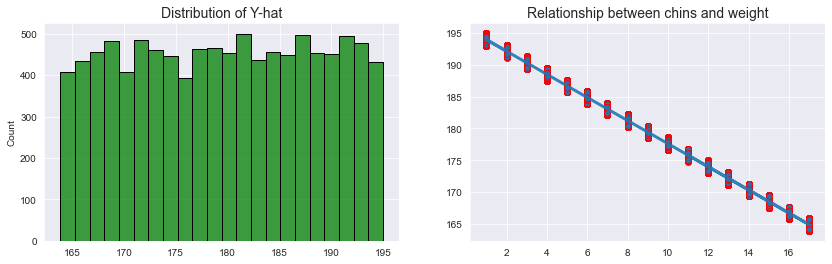

In [481]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

sns.histplot(Y_hats_linregress, ax=ax1, edgecolor='black', color='g')
ax1.set_title('Distribution of Y-hat', fontsize=14)

ax2 = plt.scatter(x=chins_random_X, y=Y_hats_linregress, alpha=0.9, edgecolor='red')
ax2 = plt.plot(chins_random_X, Y_hats_regplot, alpha=0.9, linewidth=3)
ax2 = plt.title('Relationship between chins and weight', fontsize=14)


plt.show()

#### <b>Scikit-learn - Supervise Learning Estimator - Linear Regression</b>

In [482]:
Xfit_train_enriched, Xfit_test_enriched, yfit_train_enriched, yfit_test_enriched = \
train_test_split(fit_chins_enriched, fit_weight_enriched, random_state=3343)


In [483]:
np.shape(Xfit_train_enriched.reshape(7500,1))
print(np.shape(Xfit_test_enriched))

(2500,)


In [484]:
linreg_fitness_enriched = LinearRegression(normalize=True)
linreg_fitness_enriched.fit(Xfit_train_enriched.reshape(7500,1), yfit_train_enriched )

LinearRegression(normalize=True)

In [485]:
fit_pred_e = linreg_fitness_enriched.predict(Xfit_test_enriched.reshape(2500,1))


In [486]:
fit_resid_e_df = \
pd.DataFrame(list(zip(yfit_test_enriched, fit_pred_e)), columns=['True_values', 'Predictions'])

fit_resid_e_df['Residuals'] = \
fit_resid_e_df.Predictions - fit_resid_e_df.True_values


fit_resid_e_df.head()

,True_values,Predictions,Residuals
0,179.281887,178.921108,-0.360779
1,189.863529,190.375245,0.511716
2,175.382633,174.780849,-0.601784
3,164.743964,165.239617,0.495653
4,188.673076,188.878696,0.205620


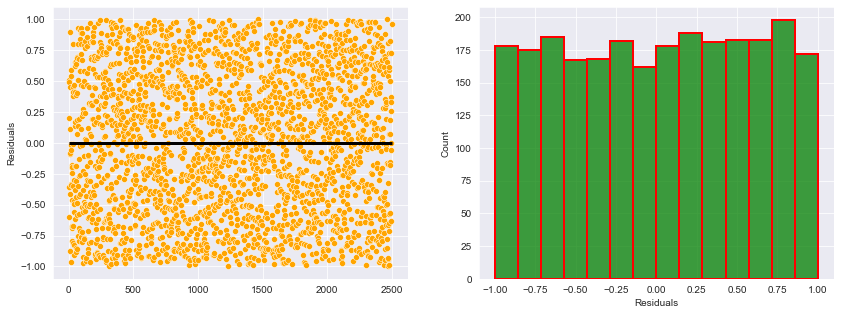

In [487]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax = sns.scatterplot(x=fit_resid_e_df.index, y=fit_resid_e_df.Residuals, color='orange')
ax = ax.hlines(0, 0, 2500, color='black', linewidth=3)

ax2 = fig.add_subplot(122)
ax2 = sns.histplot(x=fit_resid_e_df.Residuals, edgecolor='r', linewidth=2, color='g')


plt.show()


The residuals are not normal distributed.<br>
The residuals are mirroring the error term.<br>
This means a linear regression model is not applicable, but as the model is tautological constructed
the residuals are very small.

#### <b>Random normal error terms</b>

In [488]:
mu_444, sigma_444 = 0, 0.1
np.random.RandomState(234)
rd_normal_error = np.random.normal(mu_444, sigma_444, 10000)

print(np.max(rd_normal_error))
print(np.min(rd_normal_error))

0.3949839736087988
-0.39890139418072795


In [489]:
Y_hats_linregress_2 = []

for i, error in zip(chins_random_X, rd_normal_error):
    Y_hat = slope_fit_e * i + intercept_fit_e + error
    Y_hats_linregress_2.append(Y_hat)
    
print(len(Y_hats_linregress_2))

10000


In [490]:
Xfit_train_444, Xfit_test_444, yfit_train_444, yfit_test_444 = \
train_test_split(fit_chins_enriched, Y_hats_linregress_2, random_state=3343)

print(np.shape(Xfit_train_444))
print(np.shape(Xfit_test_444))

(7500,)
(2500,)


In [491]:
Xfit_train_444 = Xfit_train_444.reshape(7500,1)
print(np.shape(Xfit_train_444))

Xfit_test_444 = Xfit_test_444.reshape(2500,1)
print(np.shape(Xfit_test_444))


(7500, 1)
(2500, 1)


In [492]:
linreg_fitness_enriched = LinearRegression(normalize=True)
linreg_fitness_enriched.fit(Xfit_train_444, yfit_train_444 )

LinearRegression(normalize=True)

In [493]:
fit_pred_444 = linreg_fitness_enriched.predict(Xfit_test_444.reshape(2500,1))


In [494]:
fit_resid_444_df = \
pd.DataFrame(list(zip(yfit_test_444, fit_pred_444)), columns=['True_values', 'Predictions'])

fit_resid_444_df['Residuals'] = \
fit_resid_444_df.Predictions - fit_resid_444_df.True_values


fit_resid_444_df.head()

,True_values,Predictions,Residuals
0,164.785947,179.599095,14.813148
1,164.833567,179.482864,14.649297
2,192.232113,179.641109,-12.591004
3,188.453663,179.737929,-8.715734
4,168.373314,179.498050,11.124736


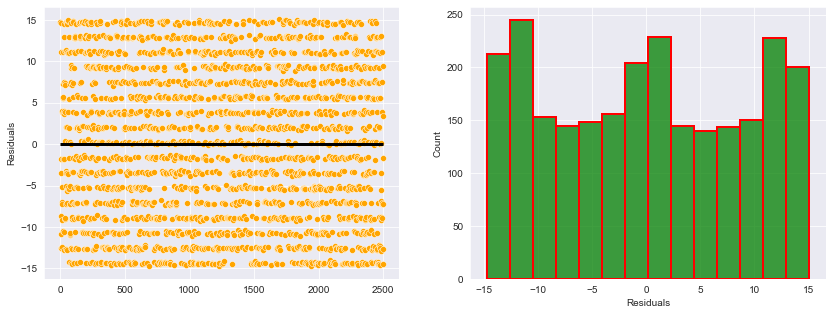

In [495]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax = sns.scatterplot(x=fit_resid_444_df.index, y=fit_resid_444_df.Residuals, color='orange')
ax = ax.hlines(0, 0, 2500, color='black', linewidth=3)

ax2 = fig.add_subplot(122)
ax2 = sns.histplot(x=fit_resid_444_df.Residuals, edgecolor='r', linewidth=2, color='g')


plt.show()


Substituting random uniform error terms with random normal error terms generates 
normal distributed residuals.This suffices the condition of normal distributed residuals.

#### <b>Evaluation metrics</b>

In [496]:
# from sklearn.metrics import r2_score
r2_fit_e = r2_score(yfit_test_enriched, fit_pred_e)
print(r2_fit_e )

r2_fit_444 = r2_score(yfit_test_444, fit_pred_444)
print(r2_fit_444)

0.9952086130290467
-0.0006769556835044543


In [497]:
# from sklearn.metrics import mean_absolute_error
MAE_fit_e = mean_absolute_error(yfit_test_enriched, fit_pred_e)
print(MAE_fit_e)

MAE_fit_444 = mean_absolute_error(yfit_test_444, fit_pred_444)
print(MAE_fit_444)

0.5023995369806309
7.762885065445633


In [498]:
# from sklearn.metrics import mean_squared_error
MSE_fit_e = mean_squared_error(yfit_test_enriched, fit_pred_e)
print(MSE_fit_e)

MSE_fit_444 = mean_squared_error(yfit_test_444, fit_pred_444)
print(MSE_fit_444)

0.3340399653498282
80.39355830119614


In [499]:
RMSE_fit_e = np.sqrt(MSE_fit_e)
print(RMSE_fit_e)

RMSE_fit_444 = np.sqrt(MSE_fit_444)
print(RMSE_fit_444)

0.5779619064867755
8.966245496371162


The evaluation metrics of the random normal distributed error terms are better.<br>
This is aligned with a better fit confirmed by the random normal distributed residuals.



<p>
Why not use?
</p> 


#### <b>sklearn.datasets.make_regression</b>

<p>
"Generate a random regression problem.<br>
The output is generated by applying a (potentially biased) random linear regression model with n_informative nonzero regressors to the previously generated input and some gaussian centered noise with some adjustable scale."<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html" target="_blank">sklearn.datasets</a> 
</p> 

In [500]:
xxx,yyy, coef = \
datasets.make_regression(n_samples=10000, n_features=5, n_informative=10, 
                         n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.9, 
                         noise=0.0, shuffle=True, coef=True, random_state=None)

In [501]:
print(np.shape(xxx))
xxx[0][:10]

(10000, 5)


array([ 0.24391442, -0.99487024, -0.16224374, -0.79961502,  1.00519129])

In [502]:
print(np.shape(yyy))
yyy[:10]

(10000,)


array([ -22.2477777 , -235.08050228, -289.88787037, -135.23189981,
         31.71344153, -111.92214713, -109.07493791,   50.36106925,
        109.0315473 ,   66.99364078])

In [503]:
yu = yyy.reshape(10000, 1)
print(np.shape(yu))

(10000, 1)


In [504]:
xy = np.concatenate((xxx, yu), axis=1)
np.shape(xy)

(10000, 6)

In [505]:
xy_df = pd.DataFrame(xy)
xy_df.info()
xy_df[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


,0,1,2,3,4,5
0,0.243914,-0.994870,-0.162244,-0.799615,1.005191,-22.247778
1,-1.216884,0.170805,-0.991709,-0.274224,-1.753798,-235.080502
2,-1.116393,-0.800402,-2.096832,-0.662226,0.667963,-289.887870
3,-0.476802,1.817727,-0.497561,-1.139358,-1.488108,-135.231900
4,1.349233,0.192497,0.262365,-1.762325,-0.057161,31.713442


In [506]:
xy_df.describe()

,0,1,2,3,4,5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.000156,-0.001956,-0.002692,-0.010966,-0.009683,-1.109743
std,1.014291,1.003056,1.008132,0.994135,0.996079,128.172564
min,-3.436029,-3.757414,-4.059006,-3.475040,-4.270949,-541.544166
25%,-0.679671,-0.666073,-0.682897,-0.701550,-0.684395,-87.708113
50%,-0.001474,-0.009324,-0.002692,-0.018804,-0.012274,-0.336220
75%,0.700245,0.668097,0.678421,0.673589,0.663917,84.067989
max,4.089914,3.671365,3.837812,4.076000,3.914665,506.305363


The statistics of the features (mean, min, max ...) are aligned.<br>
So scaling might not be helpful.

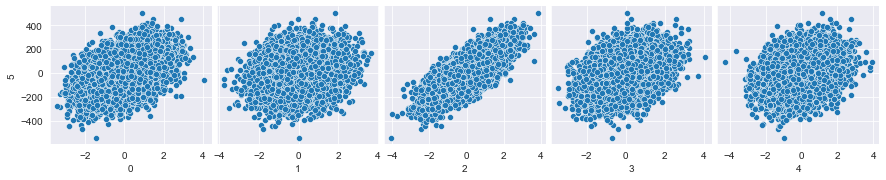

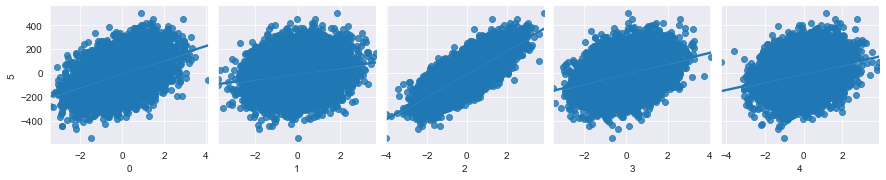

In [507]:
sns.pairplot(data=xy_df, x_vars=[0,1,2,3,4], y_vars=[5])
sns.pairplot(data=xy_df, x_vars=[0,1,2,3,4], y_vars=[5], kind='reg')
plt.show()

This is not longer the fitness data.<br>
However I am going to explore the creation of synthetic data in further projects, but not here.

In [508]:
xy_df.corr()

,0,1,2,3,4,5
0,1.000000,-0.001057,-0.011071,0.005581,-0.001170,0.451368
1,-0.001057,1.000000,0.024538,0.012696,-0.014779,0.190909
2,-0.011071,0.024538,1.000000,-0.005547,0.007079,0.760327
3,0.005581,0.012696,-0.005547,1.000000,0.008968,0.329084
4,-0.001170,-0.014779,0.007079,0.008968,1.000000,0.274890
5,0.451368,0.190909,0.760327,0.329084,0.274890,1.000000


In [509]:
xy_df.corr()

,0,1,2,3,4,5
0,1.000000,-0.001057,-0.011071,0.005581,-0.001170,0.451368
1,-0.001057,1.000000,0.024538,0.012696,-0.014779,0.190909
2,-0.011071,0.024538,1.000000,-0.005547,0.007079,0.760327
3,0.005581,0.012696,-0.005547,1.000000,0.008968,0.329084
4,-0.001170,-0.014779,0.007079,0.008968,1.000000,0.274890
5,0.451368,0.190909,0.760327,0.329084,0.274890,1.000000


In [510]:
xy_df.describe()

,0,1,2,3,4,5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.000156,-0.001956,-0.002692,-0.010966,-0.009683,-1.109743
std,1.014291,1.003056,1.008132,0.994135,0.996079,128.172564
min,-3.436029,-3.757414,-4.059006,-3.475040,-4.270949,-541.544166
25%,-0.679671,-0.666073,-0.682897,-0.701550,-0.684395,-87.708113
50%,-0.001474,-0.009324,-0.002692,-0.018804,-0.012274,-0.336220
75%,0.700245,0.668097,0.678421,0.673589,0.663917,84.067989
max,4.089914,3.671365,3.837812,4.076000,3.914665,506.305363


#### <b>Scikit-learn - Supervise Learning Estimator - Linear Regression</b>

In [511]:
xy_features = xy_df.iloc[:,:4]
print(xy_features.shape)

xy_target = xy_df.iloc[:,5]
print(xy_target.shape)

(10000, 4)
(10000,)


In [512]:
X_train, X_test, y_train, y_test = \
train_test_split(xy_features, xy_target, random_state=33)

In [513]:
print(X_test.shape)
X_test.head()

(2500, 4)


,0,1,2,3
5672,0.156786,1.919792,-0.681669,-0.309579
3346,2.844673,0.713223,1.259826,-0.546521
5867,0.329514,-0.231598,-0.183861,0.334343
2322,-0.860579,-0.798187,-1.153528,1.285060
5233,-0.769182,-0.070039,0.883964,-0.226009


In [514]:
print(y_test.shape)
y_test.head()

(2500,)


5672    -24.702993
3346    223.994297
5867     -3.028128
2322    -83.194697
5233    -24.613931
Name: 5, dtype: float64

In [515]:
print(np.shape(y_test))
print(type(y_test))

(2500,)
<class 'pandas.core.series.Series'>


In [516]:
y_test_2 = y_test.to_numpy().reshape(-1,1)
print(np.shape(y_test_2))
print(np.shape(X_train))

(2500, 1)
(7500, 4)


In [517]:
# from sklearn.linear_model import LinearRegression
lr_xy = LinearRegression(normalize=False)
lr_xy.fit(X_train, y_train)

LinearRegression()

In [518]:
y_predict = lr_xy.predict(X_test)
y_predict_s = pd.Series(y_predict)

print(y_predict.shape)
print(y_predict_s.shape)
print(y_predict_s[:5])

(2500,)
(2500,)
0    -28.914842
1    279.167727
2     10.033552
3   -125.014794
4     29.600384
dtype: float64


In [519]:
print(type(y_test))
y_test[:5]

<class 'pandas.core.series.Series'>


5672    -24.702993
3346    223.994297
5867     -3.028128
2322    -83.194697
5233    -24.613931
Name: 5, dtype: float64

In [520]:
hh= pd.DataFrame(list(zip(y_test, y_predict)))
hh.columns = ['Actual', 'Predicted']
hh['Residuals'] = hh.Actual - hh.Predicted
hh.head()

,Actual,Predicted,Residuals
0,-24.702993,-28.914842,4.211848
1,223.994297,279.167727,-55.173430
2,-3.028128,10.033552,-13.061680
3,-83.194697,-125.014794,41.820097
4,-24.613931,29.600384,-54.214316


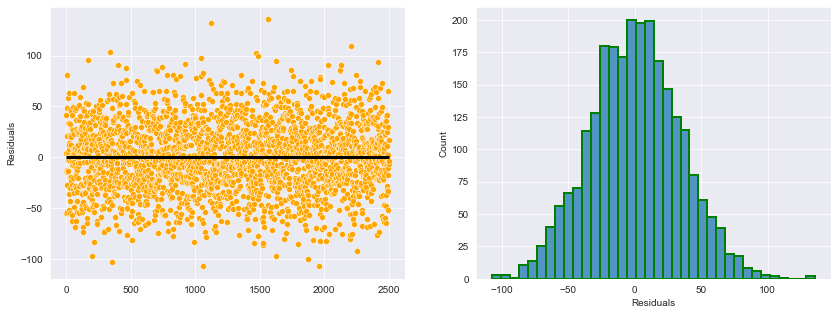

In [521]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax = sns.scatterplot(x=hh.index, y=hh.iloc[:,2], color='orange')
ax = ax.hlines(0, 0, 2500, color='black', linewidth=3)

ax2 = fig.add_subplot(122)
ax2 = sns.histplot(x=hh.Residuals, edgecolor='g', linewidth=2)


plt.show()


The residuals are normally distributed.<br>
This suffices the Linear regression condition of normality.

#### <b>Evaluation metrics</b>

In [522]:
# from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
print(r2)

0.9277579612449322


In [523]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_predict)
print(MAE)

27.253519751396862


In [524]:
# from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
print(MSE)

1167.3113383132745


In [525]:
RMSE = np.sqrt(MSE)
print(RMSE)

34.165938276495126


The proportion of variance of the independent variable explained by the independent variable is relatively high.
The RMSE and MAR indicate a high deviation of predicted values from the true values. 
The model is improvable.